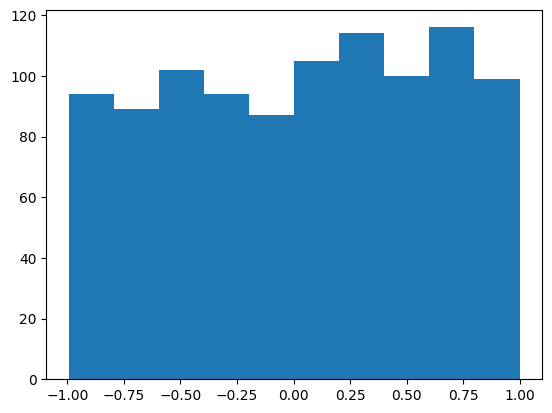

In [4]:
from samplers import get_data_sampler, UniformSampler

set_of_xs = []
data_sampler = UniformSampler(1)
data = data_sampler.sample_xs(1, 1000, 1).squeeze().squeeze()
import matplotlib.pyplot as plt

plt.hist(data)
plt.show()

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

torch.Size([1000000, 10, 1])
torch.Size([1000000, 10])
torch.Size([10000000])


KeyboardInterrupt: 

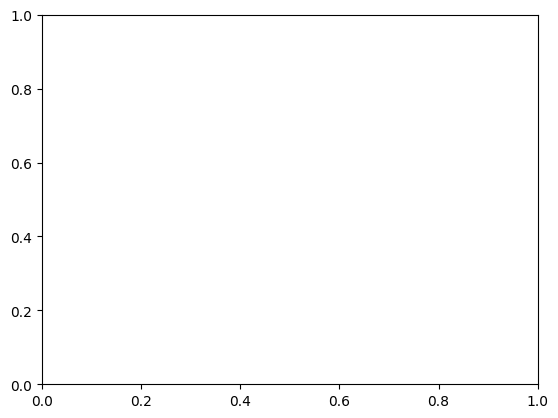

In [16]:
data =  data_sampler.sample_xs(10, 1000000, 1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1000000, basis_dim=1, different_degrees=False, lowest_degree=5, highest_degree=5)
#print(data.shape)
ys = task.evaluate(data).squeeze()
#print(ys.shape)
ys = ys.reshape(-1)
#print(ys.shape)
plt.hist(ys, bins=30)
plt.show()

torch.Size([1000000, 12, 1])


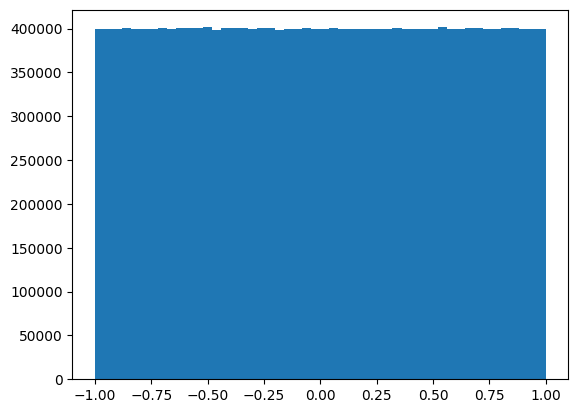

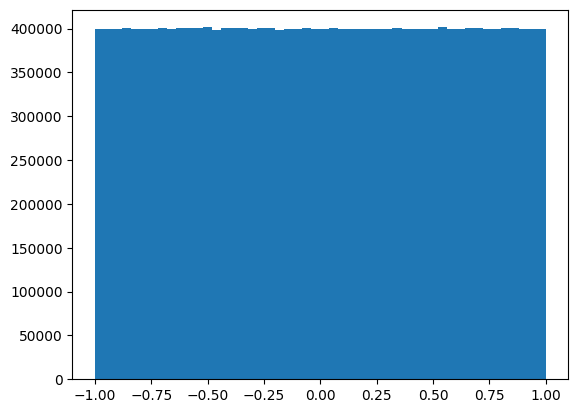

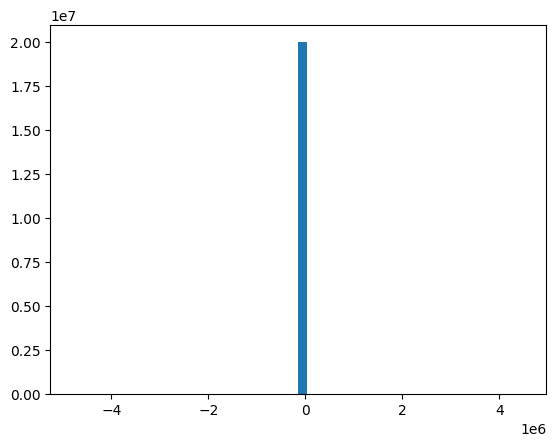

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 8.00000e+00 6.65805e+05 8.00000e+00 6.00000e+00
 2.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 2.00000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 3. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


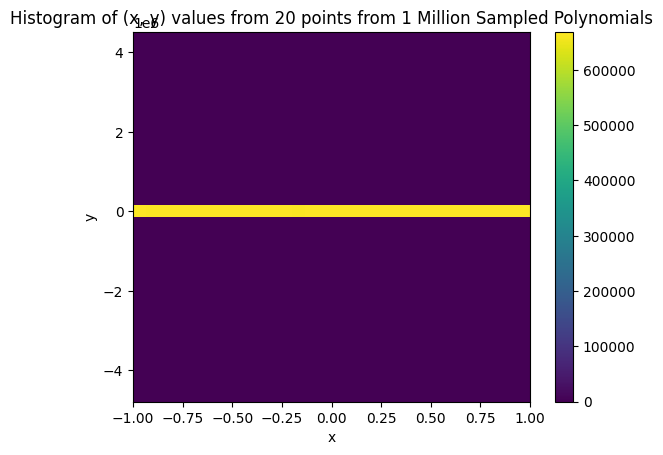

In [7]:
import numpy as np
from tasks import get_task_sampler, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(20, 1000000, 1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1000000, basis_dim=11, different_degrees=True, lowest_degree=8, highest_degree=8)
ys = task.evaluate(data).squeeze()
ys = ys.reshape(-1)
data = data.reshape(-1)
plt.hist(data, bins=50)
plt.show()
data = data.numpy()
ys = ys.numpy()
plt.hist(data, bins=50)
plt.show()
plt.hist(ys, bins=50)
plt.show()
selected_ys = ys[data < 0.5]
selected_data = data[data < 0.5]
fig = plt.figure()
ax = fig.add_subplot(111)

counts,xedges,yedges,img = ax.hist2d(data, ys, bins=[30,30])
print(counts[0])
print(counts[:, 0])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram of (x, y) values from 20 points from 1 Million Sampled Polynomials")
plt.xlim([-1, 1])
plt.colorbar(img)
plt.show()